In [18]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: DataFrame or ndarray of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    if isinstance(data, pd.DataFrame):
        data = data.values  # Convert DataFrame to ndarray if it's a DataFrame
        
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        resultsdf.loc[gap_index] = [k, gap]  
    return (gaps.argmax() + 1, resultsdf)




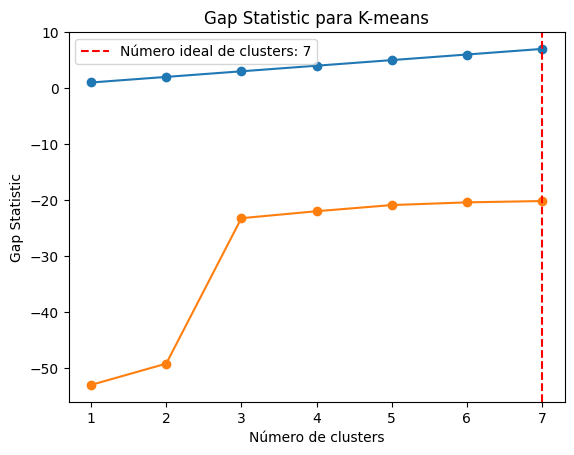

Número ideal de clusters: 7
Valores do Gap Statistic:    clusterCount        gap
0           1.0 -53.052093
1           2.0 -49.245852
2           3.0 -23.251437
3           4.0 -22.008633
4           5.0 -20.908327
5           6.0 -20.424562
6           7.0 -20.187116


In [38]:
# abrir dataset com os indicadores
PATH_TO_DATASET="../dataset/dados_k_means_2.csv"
dfArquivo=pd.read_csv(PATH_TO_DATASET,sep=";")
dfArquivo.describe()

# Defina seu conjunto de dados como cluster_df
cluster_df = dfArquivo.values

# Chame a função optimalK para calcular o número ótimo de clusters
best_k, gaps = optimalK(cluster_df,maxClusters=8)

# Plotagem dos resultados
plt.plot(range(1, len(gaps) + 1), gaps, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para K-means')
plt.axvline(x=best_k, color='red', linestyle='--', label='Número ideal de clusters: {}'.format(best_k))
plt.legend()
plt.show()

# Imprime o número ideal de clusters e os valores do Gap Statistic
print("Número ideal de clusters:", best_k)
print("Valores do Gap Statistic:", gaps)

In [39]:
df

,clusterCount,gap
0,1.0,-52.998493
1,2.0,-49.181245
2,3.0,-23.173276
3,4.0,-21.915469
4,5.0,-21.735907
5,6.0,-20.373913
6,7.0,-19.687437
7,8.0,-19.350402
8,9.0,-18.854319
9,10.0,-18.691197


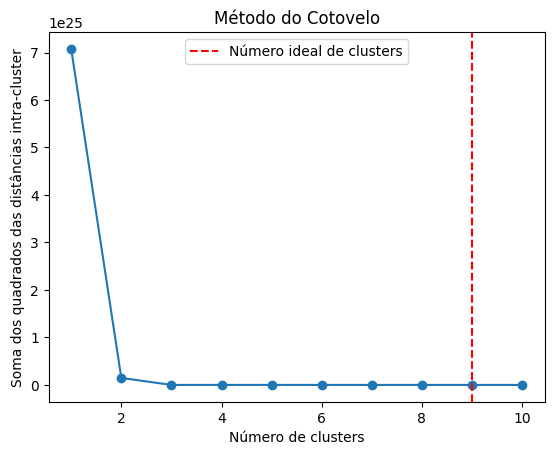

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_clusters=10):
    """
    Implementação do método de cotovelo para encontrar o número ideal de clusters.
    
    Parâmetros:
        data: ndarray de forma (n_samples, n_features)
            O conjunto de dados a ser agrupado.
        max_clusters: int, opcional (padrão=10)
            O número máximo de clusters a serem testados.
    
    Retorna:
        None. Plota o gráfico do método do cotovelo com o número ideal de clusters marcado.
    """
    distortions = []  # Armazena a soma dos quadrados das distâncias intra-cluster
    
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # Inertia_ contém a soma dos quadrados das distâncias intra-cluster
    
    # Encontrar o ponto de cotovelo (método mais simples - procurando a maior inclinação)
    differences = np.diff(distortions)
    elbow_index = np.argmax(differences) + 1
    
    # Plotagem do gráfico do método do cotovelo
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Soma dos quadrados das distâncias intra-cluster')
    plt.title('Método do Cotovelo')
    plt.axvline(x=elbow_index, color='red', linestyle='--', label='Número ideal de clusters')  # Adiciona uma linha vertical
    plt.legend()
    plt.show()

# Exemplo de uso:
# Substitua 'seu_conjunto_de_dados' pelo seu conjunto de dados
elbow_method(dfArquivo)


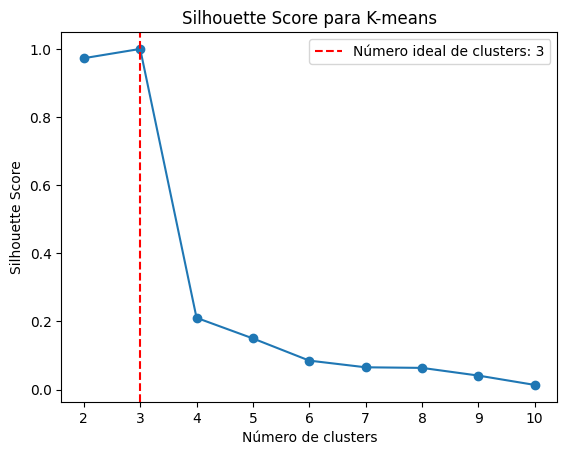

Número ideal de clusters: 3
Silhouette Scores: [0.9727695665923831, 0.9999942151460653, 0.21049376173087833, 0.1499806863177683, 0.08489048889399052, 0.06526546295536198, 0.06352539073190551, 0.040933599344272, 0.013512469905523895]


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def silhouette_score_kmeans(data, max_clusters=10):
    """
    Implementação do Silhouette Score para determinar o número ideal de clusters usando K-means.
    
    Parâmetros:
        data: ndarray de forma (n_samples, n_features)
            O conjunto de dados a ser agrupado.
        max_clusters: int, opcional (padrão=10)
            O número máximo de clusters a serem testados.
    
    Retorna:
        best_k: int
            O número ideal de clusters com base no Silhouette Score.
        silhouette_scores: list
            Lista contendo os Silhouette Scores para cada número de clusters testado.
    """
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 porque começamos com k=2
    return best_k, silhouette_scores

# Exemplo de uso:
# Substitua 'seu_conjunto_de_dados' pelo seu conjunto de dados
best_k, silhouette_scores = silhouette_score_kmeans(dfArquivo)

# Plotagem dos resultados
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-means')
plt.axvline(x=best_k, color='red', linestyle='--', label='Número ideal de clusters: {}'.format(best_k))
plt.legend()
plt.show()

# Imprime o número ideal de clusters e os Silhouette Scores
print("Número ideal de clusters:", best_k)
print("Silhouette Scores:", silhouette_scores)

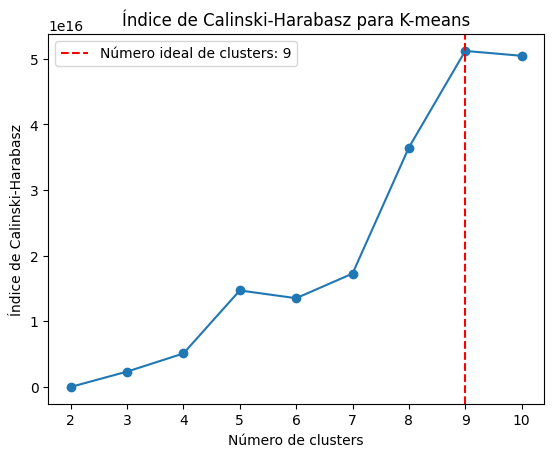

Número ideal de clusters: 9
Índices de Calinski-Harabasz: [22576.222038715576, 2331695381047370.0, 5096036818174119.0, 1.469593816132161e+16, 1.3514254095462238e+16, 1.7265935203204912e+16, 3.647046820295366e+16, 5.118438441920532e+16, 5.044254367354018e+16]


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

def calinski_harabasz_index(data, max_clusters=10):
    """
    Implementação do índice de Calinski-Harabasz para determinar o número ideal de clusters usando K-means.
    
    Parâmetros:
        data: ndarray de forma (n_samples, n_features)
            O conjunto de dados a ser agrupado.
        max_clusters: int, opcional (padrão=10)
            O número máximo de clusters a serem testados.
    
    Retorna:
        best_k: int
            O número ideal de clusters com base no índice de Calinski-Harabasz.
        calinski_scores: list
            Lista contendo os índices de Calinski-Harabasz para cada número de clusters testado.
    """
    calinski_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        calinski_score = calinski_harabasz_score(data, cluster_labels)
        calinski_scores.append(calinski_score)
    
    best_k = calinski_scores.index(max(calinski_scores)) + 2  # +2 porque começamos com k=2
    return best_k, calinski_scores

# Exemplo de uso:
# Substitua 'seu_conjunto_de_dados' pelo seu conjunto de dados
best_k, calinski_scores = calinski_harabasz_index(dfArquivo)

# Plotagem dos resultados
plt.plot(range(2, len(calinski_scores) + 2), calinski_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz para K-means')
plt.axvline(x=best_k, color='red', linestyle='--', label='Número ideal de clusters: {}'.format(best_k))
plt.legend()
plt.show()

# Imprime o número ideal de clusters e os índices de Calinski-Harabasz
print("Número ideal de clusters:", best_k)
print("Índices de Calinski-Harabasz:", calinski_scores)


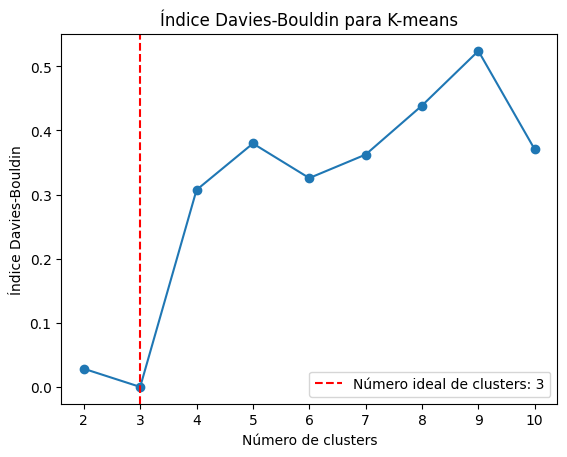

Número ideal de clusters: 3
Índices Davies-Bouldin: [0.028368492271402986, 9.927783501161036e-06, 0.307271795489811, 0.3796761655660199, 0.32572188913294803, 0.36237348545189646, 0.4388114346601869, 0.5240036852925477, 0.37038269812447167]


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

def davies_bouldin_index(data, max_clusters=10):
    """
    Implementação do Índice Davies-Bouldin para determinar o número ideal de clusters usando K-means.
    
    Parâmetros:
        data: ndarray de forma (n_samples, n_features)
            O conjunto de dados a ser agrupado.
        max_clusters: int, opcional (padrão=10)
            O número máximo de clusters a serem testados.
    
    Retorna:
        best_k: int
            O número ideal de clusters com base no Índice Davies-Bouldin.
        davies_bouldin_scores: list
            Lista contendo os Índices Davies-Bouldin para cada número de clusters testado.
    """
    davies_bouldin_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        davies_bouldin_score_value = davies_bouldin_score(data, cluster_labels)
        davies_bouldin_scores.append(davies_bouldin_score_value)
    
    best_k = davies_bouldin_scores.index(min(davies_bouldin_scores)) + 2  # +2 porque começamos com k=2
    return best_k, davies_bouldin_scores

# Exemplo de uso:
# Substitua 'seu_conjunto_de_dados' pelo seu conjunto de dados
best_k, davies_bouldin_scores = davies_bouldin_index(dfArquivo)

# Plotagem dos resultados
plt.plot(range(2, len(davies_bouldin_scores) + 2), davies_bouldin_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin para K-means')
plt.axvline(x=best_k, color='red', linestyle='--', label='Número ideal de clusters: {}'.format(best_k))
plt.legend()
plt.show()

# Imprime o número ideal de clusters e os Índices Davies-Bouldin
print("Número ideal de clusters:", best_k)
print("Índices Davies-Bouldin:", davies_bouldin_scores)


In [44]:
dfArquivo

,Census tract,DM1,DM2,DM3,DM4,EC1,EC2,EC3,ED1,ED2,HS1,HS2,HS3,HS4,HS5,EN1
0,411520005010001,2.22,1.45,41.24,0.73,7.25,3.99,14.49,0.00,0.36,0.00,1.45,100.00,100.00,37.32,0.211989
1,411520005010002,2.37,0.99,34.45,0.63,3.96,7.59,14.19,0.00,0.33,0.00,15.23,100.00,60.60,39.07,0.157180
2,411520005010003,2.54,0.97,37.61,0.61,5.44,10.10,9.90,0.00,0.78,0.00,14.17,100.00,84.08,31.46,0.135831
3,411520005010004,2.65,0.71,41.02,0.80,3.19,15.60,12.41,3.70,0.71,0.00,6.38,100.00,10.99,27.66,0.194263
4,411520005010005,2.74,0.39,32.26,0.71,3.53,9.41,7.06,0.00,0.39,0.00,5.10,99.61,23.53,27.06,0.200033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,412625605000066,3.24,0.48,35.83,1.27,6.52,0.24,68.12,0.94,5.07,0.00,0.24,3.38,100.00,31.40,0.326977
479,412625605000067,3.20,0.90,39.22,1.31,5.67,0.00,69.25,3.19,7.16,0.00,0.00,6.57,99.10,26.57,0.423743
480,412625605000068,3.22,1.01,44.07,1.38,15.98,0.10,62.89,1.48,8.90,0.10,0.10,3.14,98.18,26.72,0.333365
481,412625605000069,3.33,7.18,50.91,2.29,29.60,0.00,57.47,1.57,8.91,0.29,0.00,1.44,100.00,28.16,0.330927
